<a href="https://colab.research.google.com/github/Wajih-Ul-Hasan/Car_Price_Prediction/blob/main/DepressionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving dataset.csv to dataset.csv


In [ ]:
df = pd.read_csv('dataset.csv',index_col=[0])

In [ ]:
df.head()

,Age,Gender,Body_Height,Body_Weight,Education_ID,Financial_status,GDS,Independent_or_depend_on_family,Marital_status_ID,MNAa_total,MNAb_total,MMSE_class_binary
1,86,0,148.3,61.1,1.0,8.0,5.0,0.0,3.0,12.0,10.5,0
2,92,1,156.2,61.5,NaN,4.0,2.0,0.0,2.0,14.0,15.0,0
3,81,0,146.3,47.0,NaN,2.0,3.0,0.0,3.0,13.0,15.0,0
4,79,0,152.2,65.3,NaN,2.0,3.0,0.0,1.0,14.0,16.0,0
5,86,0,157.3,57.3,1.0,2.0,2.0,0.0,3.0,13.0,13.5,0


<h2>Exploratory Data Analysis</h2>

In [ ]:
#Checking Null Values

df.isna().sum()

Age                                  0
Gender                               0
Body_Height                          0
Body_Weight                          0
Education_ID                        72
Financial_status                   111
GDS                                113
Independent_or_depend_on_family    111
Marital_status_ID                  111
MNAa_total                         373
MNAb_total                         448
MMSE_class_binary                    0
dtype: int64

In [ ]:
#Summary Statistic

df.describe()

,Age,Gender,Body_Height,Body_Weight,Education_ID,Financial_status,GDS,Independent_or_depend_on_family,Marital_status_ID,MNAa_total,MNAb_total,MMSE_class_binary
count,2299.000000,2299.000000,2299.000000,2299.000000,2227.000000,2188.000000,2186.000000,2188.000000,2188.000000,1926.000000,1851.000000,2299.000000
mean,77.492823,0.318399,154.240017,57.190626,1.998653,2.675046,2.263038,0.685101,2.426417,12.694704,13.323609,0.185733
std,8.919342,0.465957,8.222128,10.278072,0.837410,1.806855,2.790123,0.464582,0.802703,1.528344,1.700184,0.388976
min,51.000000,0.000000,109.000000,21.100000,1.000000,1.000000,0.000000,0.000000,1.000000,4.000000,5.000000,0.000000
25%,70.000000,0.000000,148.500000,50.050000,1.000000,1.000000,0.000000,0.000000,2.000000,12.000000,12.500000,0.000000
50%,77.000000,0.000000,153.400000,56.300000,2.000000,2.000000,1.000000,1.000000,2.000000,13.000000,13.500000,0.000000
75%,84.000000,1.000000,160.000000,63.800000,3.000000,4.000000,3.000000,1.000000,3.000000,14.000000,14.500000,0.000000
max,104.000000,1.000000,184.000000,98.000000,4.000000,8.000000,15.000000,1.000000,6.000000,14.000000,16.000000,1.000000


In [ ]:
df.columns

Index(['Age', 'Gender', 'Body_Height', 'Body_Weight', 'Education_ID',
       'Financial_status', 'GDS', 'Independent_or_depend_on_family',
       'Marital_status_ID', 'MNAa_total', 'MNAb_total', 'MMSE_class_binary'],
      dtype='object')

In [ ]:
#Null percentage
df.isnull().sum() * 100 // 2299

Age                                 0
Gender                              0
Body_Height                         0
Body_Weight                         0
Education_ID                        3
Financial_status                    4
GDS                                 4
Independent_or_depend_on_family     4
Marital_status_ID                   4
MNAa_total                         16
MNAb_total                         19
MMSE_class_binary                   0
dtype: int64

In [ ]:
# Droping null values from those columns where null percentage is <= 5%
col_names = ['Education_ID','Financial_status','GDS','Independent_or_depend_on_family','Marital_status_ID']
df.dropna(subset=col_names , inplace=True)

In [ ]:
col_name = ['MNAa_total', 'MNAb_total']
df.loc[:, col_name] = df.loc[:, col_name].fillna(df.loc[:, col_name].median())

In [ ]:
df.isna().sum()

Age                                0
Gender                             0
Body_Height                        0
Body_Weight                        0
Education_ID                       0
Financial_status                   0
GDS                                0
Independent_or_depend_on_family    0
Marital_status_ID                  0
MNAa_total                         0
MNAb_total                         0
MMSE_class_binary                  0
dtype: int64

<h2>Data Visualization</h2>

<Axes: xlabel='Gender', ylabel='count'>

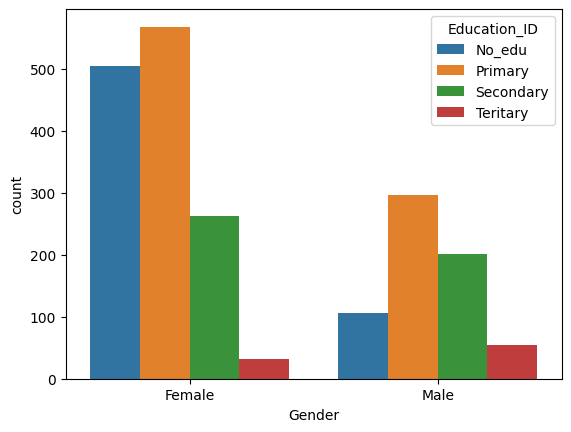

In [ ]:
# Plot the countplot with replaced labels
sns.countplot(data=df, x=df['Gender'].replace({0: 'Female', 1: 'Male'}),
              hue=df['Education_ID'].replace({1: 'No_edu', 2: 'Primary',3:'Secondary',4:'Teritary'}))


<Axes: xlabel='Marital_status_ID', ylabel='count'>

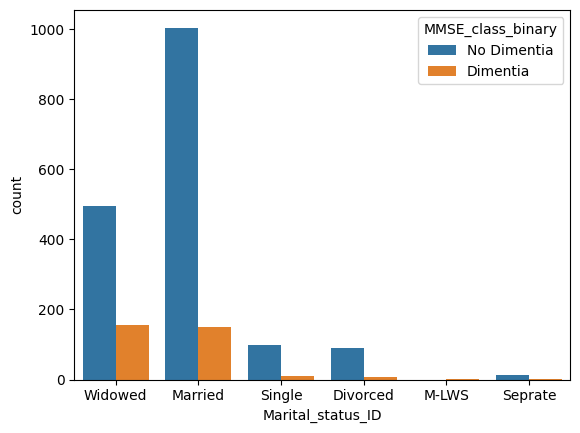

In [ ]:
#M-LWS >> Married but Live withot spouse
sns.countplot(data=df , x=df['Marital_status_ID'].replace({1:'Single',2:'Married',3:'Widowed',4:'Seprate',5:'Divorced',6:'M-LWS'}), hue = df.MMSE_class_binary.replace({0:'No Dimentia',1:'Dimentia'}) )

<Axes: xlabel='Age', ylabel='Count'>

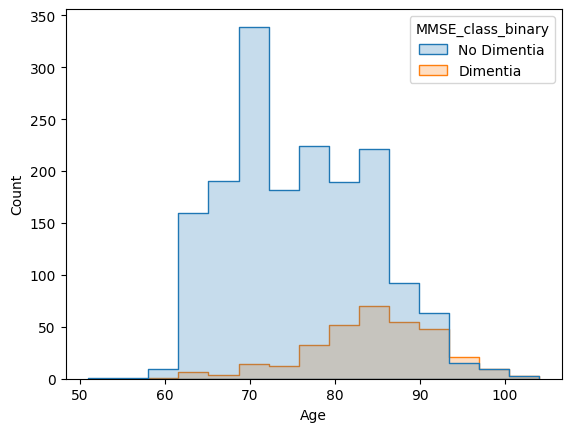

In [ ]:
sns.histplot(data=df , x = df['Age'] , element='step' , hue = df.MMSE_class_binary.replace({0:'No Dimentia',1:'Dimentia'}),bins=15)

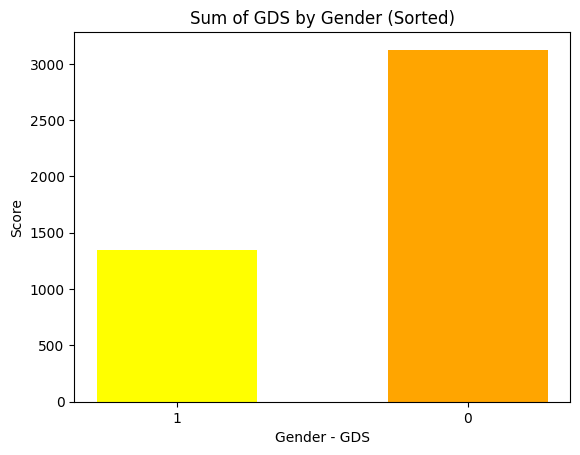

In [ ]:
sorted_gds = df.groupby('Gender')['GDS'].sum().sort_values(ascending=True)

plt.bar(sorted_gds.index.astype(str), sorted_gds.values , color = ['Yellow','Orange'] , width=0.55)
plt.xlabel('Gender - GDS')
plt.ylabel('Score')
plt.title('Sum of GDS by Gender (Sorted)')
plt.show()


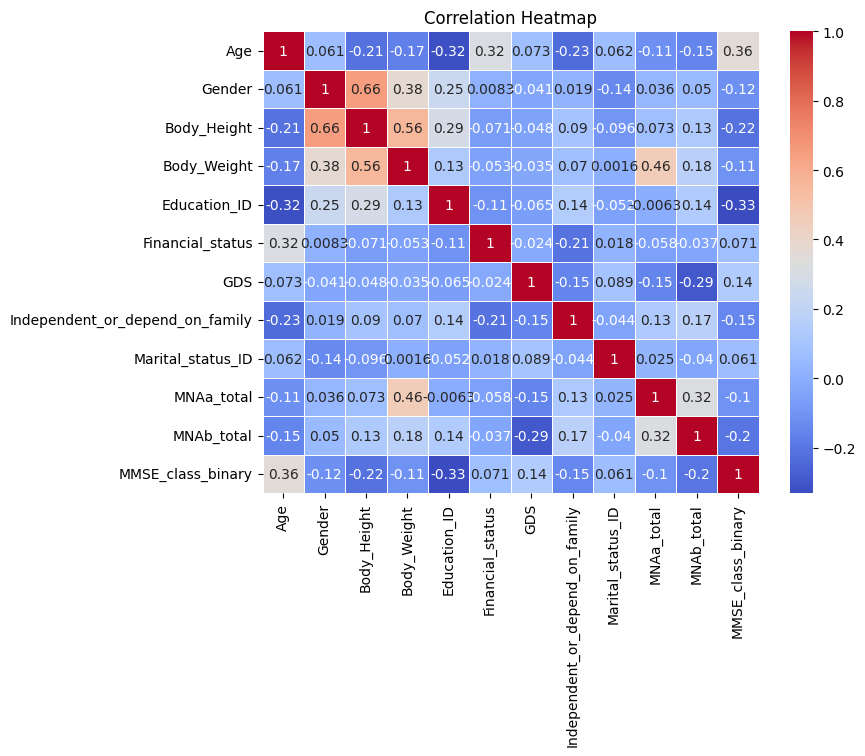

In [ ]:
# Select the desired columns from the DataFrame
selected_columns = ['Age', 'Gender', 'Body_Height', 'Body_Weight', 'Education_ID',
                    'Financial_status', 'GDS', 'Independent_or_depend_on_family',
                    'Marital_status_ID', 'MNAa_total', 'MNAb_total', 'MMSE_class_binary']
selected_df = df[selected_columns]

# Calculate the correlation matrix
correlation_matrix = selected_df.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the features and target
features = ['Age', 'Gender', 'Body_Height', 'Body_Weight', 'Education_ID',
            'Financial_status', 'GDS', 'Independent_or_depend_on_family',
            'Marital_status_ID', 'MNAa_total', 'MNAb_total']
target = 'MMSE_class_binary'

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Define the pipeline with SVM and Logistic Regression classifiers
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scaling features
    ('classifier', VotingClassifier([
        ('SVM', SVC()),
        ('Logistic Regression', LogisticRegression())
    ]))  # Step 2: VotingClassifier with SVM and Logistic Regression
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the testing data
y_pred = pipeline.predict(X_test)

# Evaluate model performance using evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.8123456790123457
Precision: 0.6666666666666666
Recall: 0.1
F1-Score: 0.1739130434782609
